In [1]:
import datetime as dt
import pandas as pd
import numpy as np
import pylab
import seaborn as sns
import scipy.stats as stats
from pandas_datareader import data as pdr
import plotly.offline as pyo
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize']=8,6
pyo.init_notebook_mode(connected=True)
pd.options.plotting.backend='plotly'

In [2]:
#normal return=today price - lastday price/lastday price or  today price/lastday price -1
#Gross return= 1+return=today price/lastday price
#Gross of return number of k period=(today price/lastday price)t-1 *....*(today price/lastday price)t-k
#log return=Ln(today price)t-1 - Ln(last day price)t-1 +......+ Ln(today price)t-k - Ln(last day price)t-k
#we use log return because the sum of normal distributed variables follows normal distribution 

In [3]:
end=dt.datetime.now()
start=dt.datetime(2011,1,1)
df=pdr.get_data_yahoo('CBA.AX',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-01-03,50.814686,50.188080,50.735119,50.337273,2395587.0,27.777107
2011-01-04,50.367111,49.581367,50.237812,49.621151,3773405.0,27.381948
2011-01-05,49.810127,49.263092,49.800182,49.660938,3942094.0,27.403893
2011-01-06,49.889698,49.491852,49.631100,49.621151,2341337.0,27.381948
2011-01-09,49.919537,49.372498,49.511745,49.780289,1993513.0,27.469751


In [4]:
simple_return=df.Close.pct_change()
log_return=np.log(df.Close/df.Close.shift(1)).dropna()
simple_return.describe(),log_return.describe()

(count    2921.000000
 mean        0.000310
 std         0.013066
 min        -0.100060
 25%        -0.006026
 50%         0.000536
 75%         0.007140
 max         0.132619
 Name: Close, dtype: float64,
 count    2921.000000
 mean        0.000225
 std         0.013070
 min        -0.105427
 25%        -0.006044
 50%         0.000536
 75%         0.007115
 max         0.124533
 Name: Close, dtype: float64)

In [5]:
n,minmax,mean,var,skew,kurt=stats.describe(simple_return.dropna())
mini,maxi=minmax
std=var**0.5#0.0002496130**0.5=0.015799145546516114

In [6]:
#making a normal distribution Using upper right skweed distribution mean,standard deviation,and obserbations
from scipy.stats import norm
x=norm.rvs(mean,std,n)
overly=np.linspace(mini,maxi,n)

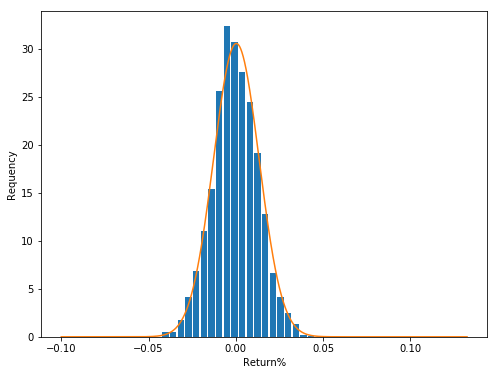

In [7]:
plt.hist(x, bins=20,rwidth=0.8,density=True,)
plt.plot(overly,norm.pdf(overly,mean,std))
plt.xlabel('Return%')
plt.ylabel('Requency')
plt.show()

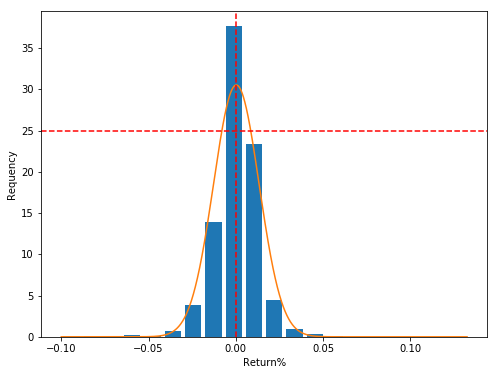

In [8]:
plt.hist(simple_return, bins=20,rwidth=0.8,density=True,)
plt.plot(overly,norm.pdf(overly,mean,std))
plt.axhline(25, linestyle='--', color='r')
plt.axvline(0, linestyle='--', color='r')
plt.xlabel('Return%')
plt.ylabel('Requency')
plt.show()

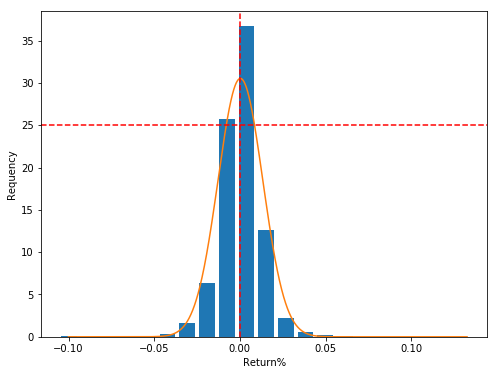

In [9]:
plt.hist(log_return, bins=20,rwidth=0.8,density=True,)
plt.plot(overly,norm.pdf(overly,mean,std))
plt.axhline(25, linestyle='--', color='r')
plt.axvline(0, linestyle='--', color='r')
plt.xlabel('Return%')
plt.ylabel('Requency')
plt.show()

In [10]:
print('First',df.Close[0],'Last',df.Close[-1])

First 50.33727264404297 Last 97.06999969482422


In [11]:
simple_return.mean()

0.0003101956816872392

In [12]:
df.Close[0]*(1+simple_return.mean())**len(simple_return)

124.58609974262217

In [13]:
m=[(1+rt) for rt in simple_return]
m[0:11],simple_return[0:10]

([nan,
  0.98577353050794,
  1.0008018212335332,
  0.9991988211686657,
  1.0032070543048228,
  1.004995017473327,
  1.00099406875613,
  1.0154915239570548,
  1.0054762536649005,
  0.9920248871267877,
  1.0086274663749382],
 Date
 2011-01-03         NaN
 2011-01-04   -0.014226
 2011-01-05    0.000802
 2011-01-06   -0.000801
 2011-01-09    0.003207
 2011-01-10    0.004995
 2011-01-11    0.000994
 2011-01-12    0.015492
 2011-01-13    0.005476
 2011-01-16   -0.007975
 Name: Close, dtype: float64)

In [14]:
np.prod(m[1:5]),m[1:5],(0.9990027196480017*0.9978787350855999*1.0148806105194628*1.005667805122185)#Cumulative Return

(0.9889349597525359,
 [0.98577353050794,
  1.0008018212335332,
  0.9991988211686657,
  1.0032070543048228],
 1.0174520257364144)

In [15]:
df.Close[0]*np.prod([(1+rt) for rt in simple_return[1:]]),df.Close[-1]

(97.06999969482378, 97.06999969482422)

In [16]:
df.Close[0]*(1+log_return.mean())**len(log_return)

97.06283564476487

In [17]:
df.Close[0]*np.exp((log_return.mean())*len(log_return))

97.06999969482389

In [18]:
log_return.tolist()

[-0.014328635844385209,
 0.0008014999466195985,
 -0.0008014999466195393,
 0.0032019226748492367,
 0.0049825837607664555,
 0.0009935749969773773,
 0.015372755333901747,
 0.0054613135070431165,
 -0.00800708418253549,
 0.008590462467904436,
 0.006201567728011454,
 -0.001933852455745834,
 0.0,
 0.012694868396988855,
 0.00533742887253612,
 0.0009501503431004652,
 -0.004759659000172318,
 0.000572359599106644,
 0.0003814155242861231,
 0.0,
 0.0026656242545450683,
 0.00889738010356208,
 0.007697410444014183,
 0.008380709568544899,
 0.021103632110846367,
 0.00957805515531236,
 -0.008670571247235257,
 -0.023495932270528336,
 -0.010080359189977356,
 0.010080359189977451,
 0.0027821800047008365,
 0.003882022811266293,
 -0.0051793865643621016,
 -0.013255170865867881,
 -0.00037589464665140873,
 -0.0086858970155184,
 0.006804084676664858,
 0.0003766025425095385,
 -0.0013188744921051251,
 -0.008900750289701775,
 -0.008788714968833053,
 0.01030937456561662,
 -0.018401891677287414,
 0.002318859148187998

In [19]:
x=[1,2,3,0,-1,-2,-3]

In [20]:
x.sort()

In [21]:
x

[-3, -2, -1, 0, 1, 2, 3]

In [22]:
#Is our assumtion correct data is normally distributed 
log_return_sorted=log_return.tolist()
log_return_sorted.sort()
worst=log_return_sorted[0]
best=log_return_sorted[-1]
std_worst=(worst-log_return.mean())/log_return.std()#worst one deviates -6.69 times more than on average deviation 
std_best=(best-log_return.mean())/log_return.std()#worst one deviates 7.879572 times more than on average deviation
print('Std dev. worse %.2f best %2f' %(std_worst,std_best))
print('Probability worse %.10f best %.14f' %(stats.norm(0,1).pdf(std_worst),stats.norm(0,1).pdf(std_best)))
#as per normal distribution structure stats.norm(0,1), probablility and likelyhood of worse case and best case
#worse one probabilitry is way more away from best one left skweed, not normal distribution 
#stats.norm(0,1) 0 is means distribution around 0 and standard deviasion is 1

Std dev. worse -8.08 best 9.510707
Probability worse 0.0000000000 best 0.00000000000000


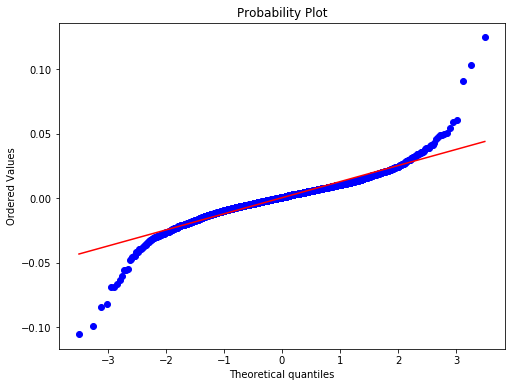

In [23]:
#Testing normality of the distribution
stats.probplot(log_return,dist='norm',plot=pylab)#redline represent normal distributuin and blue dots represent actual distribution
plt.show()

In [24]:
#box plots
log_return.plot(kind='box').update_layout(autosize=False,width=500,height=300)

In [25]:
#Hyposthesis Testing kolmogorov Smirnov test
ks_stat,p_value=stats.kstest(log_return,log_return)
print(ks_stat,p_value)
if p_value > 0.05:
    print('both are same')
else:
    print('both aren not same')


0.0 1.0
both are same


In [26]:
#Hyposthesis Testing kolmogorov Smirnov test
ks_stat,p_value=stats.kstest(log_return,'norm')#norm for normal distribution
print(ks_stat,p_value)
if p_value > 0.05:
    print('both are same')
else:
    print('both aren not same')

0.47910972162249166 0.0
both aren not same
